In [1]:
# Load libraries
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings


In [2]:
# Define the labels for the sleep health datafile
col_names = ['Gender','Age','Job', 'Sleep', 'Quality', 'Activity', 'Stress', 'Weight', 'Blood', 'BPM', 'Steps','Disorder']

# load dataset
df = pd.read_csv("sleep.health.csv", header = 0, names = col_names)


In [3]:
df.head()

,Gender,Age,Job,Sleep,Quality,Activity,Stress,Weight,Blood,BPM,Steps,Disorder
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [4]:
df.shape

(374, 12)

In [5]:
df.info

<bound method DataFrame.info of      Gender  Age                   Job  Sleep  Quality  Activity  Stress  \
1      Male   27     Software Engineer    6.1        6        42       6   
2      Male   28                Doctor    6.2        6        60       8   
3      Male   28                Doctor    6.2        6        60       8   
4      Male   28  Sales Representative    5.9        4        30       8   
5      Male   28  Sales Representative    5.9        4        30       8   
..      ...  ...                   ...    ...      ...       ...     ...   
370  Female   59                 Nurse    8.1        9        75       3   
371  Female   59                 Nurse    8.0        9        75       3   
372  Female   59                 Nurse    8.1        9        75       3   
373  Female   59                 Nurse    8.1        9        75       3   
374  Female   59                 Nurse    8.1        9        75       3   

         Weight   Blood  BPM  Steps     Disorder  
1   

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 374 entries, 1 to 374
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Gender    374 non-null    object 
 1   Age       374 non-null    int64  
 2   Job       374 non-null    object 
 3   Sleep     374 non-null    float64
 4   Quality   374 non-null    int64  
 5   Activity  374 non-null    int64  
 6   Stress    374 non-null    int64  
 7   Weight    374 non-null    object 
 8   Blood     374 non-null    object 
 9   BPM       374 non-null    int64  
 10  Steps     374 non-null    int64  
 11  Disorder  155 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 38.0+ KB


In [7]:
df.describe()

,Age,Sleep,Quality,Activity,Stress,BPM,Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [8]:
df.isnull().sum()

Gender        0
Age           0
Job           0
Sleep         0
Quality       0
Activity      0
Stress        0
Weight        0
Blood         0
BPM           0
Steps         0
Disorder    219
dtype: int64

In [9]:
df.duplicated().sum()

242

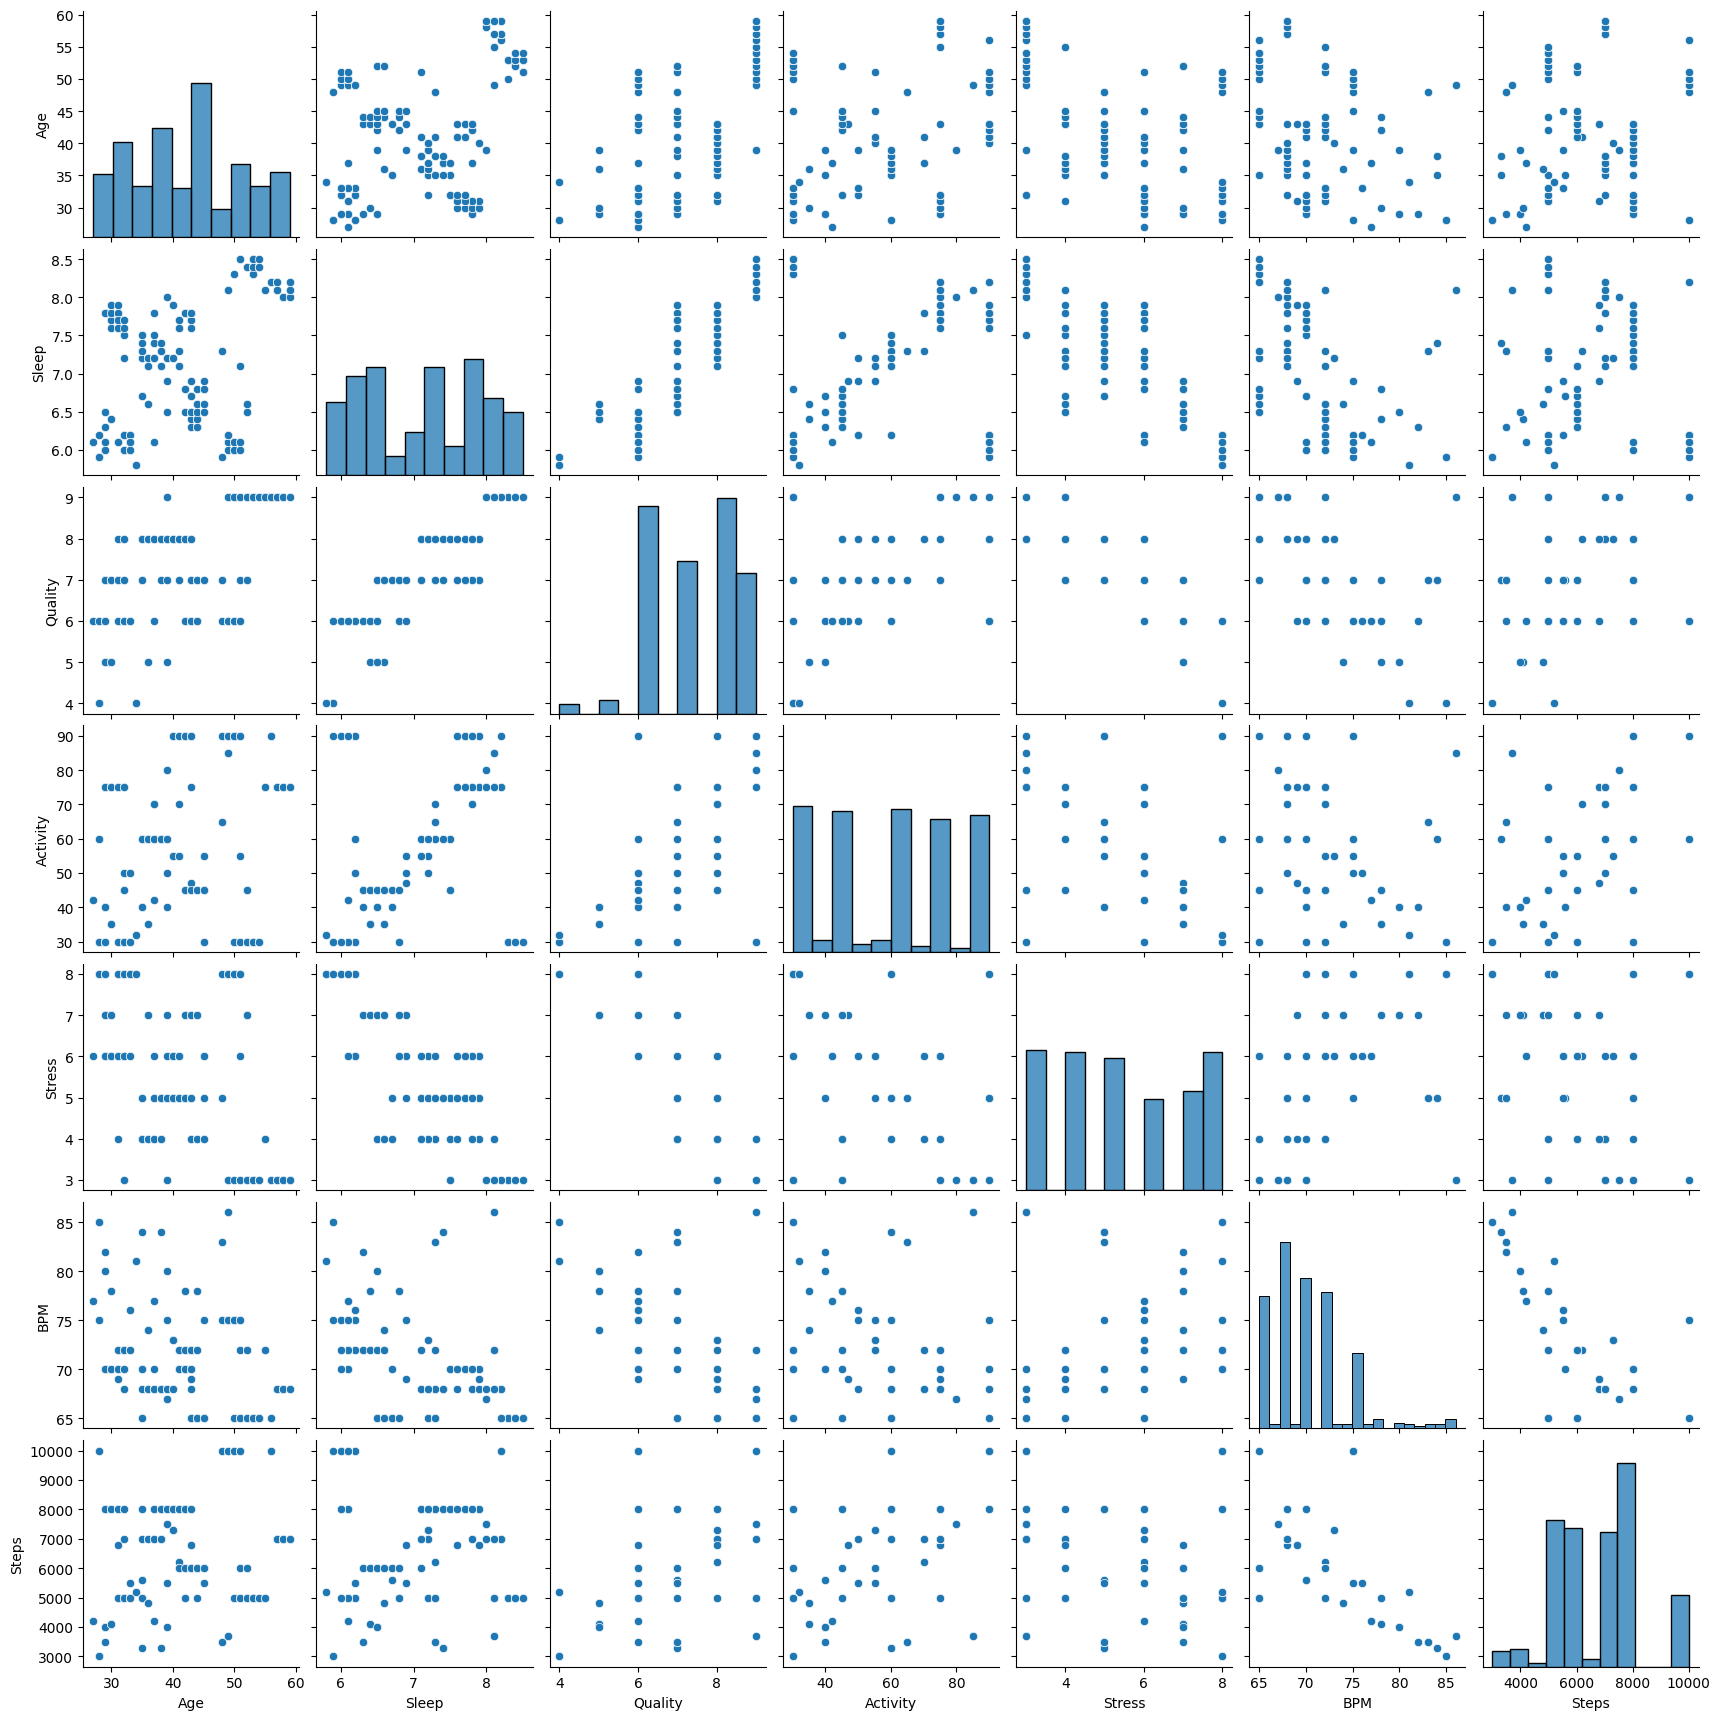

In [10]:
sns.pairplot(df)

In [11]:
df.dtypes

Gender       object
Age           int64
Job          object
Sleep       float64
Quality       int64
Activity      int64
Stress        int64
Weight       object
Blood        object
BPM           int64
Steps         int64
Disorder     object
dtype: object

In [12]:
df.isnull().values.any()

True

In [13]:
# Convert all string columns to float
df = df.apply(pd.to_numeric, errors='coerce')

# Check the data types after conversion
print(df.dtypes)


Gender      float64
Age           int64
Job         float64
Sleep       float64
Quality       int64
Activity      int64
Stress        int64
Weight      float64
Blood       float64
BPM           int64
Steps         int64
Disorder    float64
dtype: object


In [14]:
# Drop 'Gender', 'Disorder', and 'Weight' columns
df.drop(['Gender', 'Disorder', 'Weight'], axis=1, inplace=True)

<class 'pandas.core.frame.DataFrame'>
Index: 374 entries, 1 to 374
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       374 non-null    int64  
 1   Job       0 non-null      float64
 2   Sleep     374 non-null    float64
 3   Quality   374 non-null    int64  
 4   Activity  374 non-null    int64  
 5   Stress    374 non-null    int64  
 6   Blood     0 non-null      float64
 7   BPM       374 non-null    int64  
 8   Steps     374 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 29.2 KB
None
              Age  Job       Sleep     Quality    Activity      Stress  Blood  \
count  374.000000  0.0  374.000000  374.000000  374.000000  374.000000    0.0   
mean    42.184492  NaN    7.132086    7.312834   59.171123    5.385027    NaN   
std      8.673133  NaN    0.795657    1.196956   20.830804    1.774526    NaN   
min     27.000000  NaN    5.800000    4.000000   30.000000    3.000000    NaN   
25%     35.

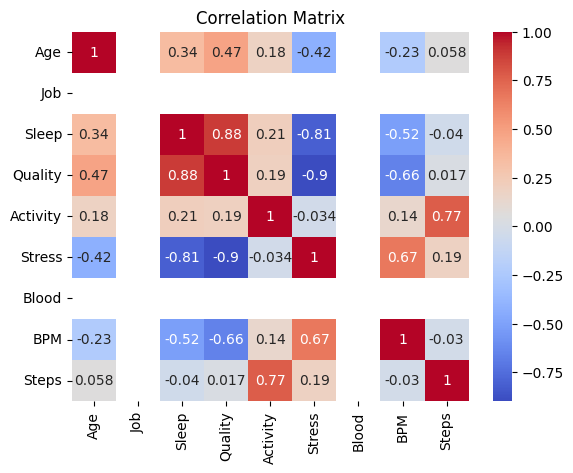

In [15]:
# Explore the dataset
print(df.info())
print(df.describe())

# Visualize correlations
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()




In [16]:
# Handle missing values
df.dropna(inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
df['Job'] = label_encoder.fit_transform(df['Job'])

# Split data into features and target
X = df[['Age', 'Job', 'Quality', 'Activity', 'Stress', 'Blood', 'BPM', 'Steps']]
y = df['Sleep']  # Assuming you may still want to predict the 'Disorder' column
